In [ ]:
pip install pyvis

In [ ]:
pip install streamlit

In [ ]:
pip install networkx;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyvis.network import Network
import networkx as nx
from IPython.core.display import display, HTML

nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px', notebook=True, cdn_resources='in_line')

nt.from_nx(nx_graph)
nt.toggle_physics(True)
nt.show('nx.html')
display(HTML('nx.html'))

nx.html


*

In [ ]:
from pyvis.network import Network
import pandas as pd
import networkx as nx
from IPython.core.display import display, HTML

got_net = Network("750px", "100%", notebook=True, cdn_resources='in_line', bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("./stormofswords.csv", error_bad_lines=False)

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
                src = e[0]
                dst = e[1]
                w = e[2]

                got_net.add_node(src, src, title=src)
                got_net.add_node(dst, dst, title=dst)
                got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
                node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])


got_net.toggle_physics(True)
got_net.show('gameofthrones.html')
display(HTML('gameofthrones.html'))

<ipython-input-18-b12761690be8>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  got_data = pd.read_csv("./stormofswords.csv", error_bad_lines=False)


gameofthrones.html


# Adjacency matrix

A matriz de adjacência é uma matriz quadrada em que as linhas e colunas representam os vértices do grafo. Cada célula da matriz indica a presença ou ausência de uma aresta entre os vértices correspondentes. Se houver uma aresta entre esses vértices, o valor da célula será 1, caso contrário, será 0.

A matriz de adjacência é uma forma conveniente de representar a conectividade de um grafo.

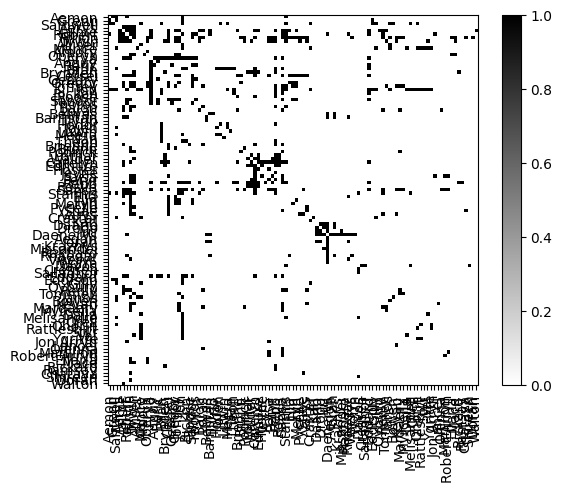

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar os dados do CSV para um DataFrame
data = pd.read_csv('./stormofswords.csv')

# Criar um objeto Graph a partir do DataFrame
G = nx.from_pandas_edgelist(data, 'Source', 'Target', 'Weight')

# Criar a matriz de adjacência
adj_matrix = nx.to_pandas_adjacency(G)

# Criar um gráfico de matriz
plt.imshow(adj_matrix.values, cmap='binary', interpolation='none')

# Definir os rótulos das linhas e colunas
plt.xticks(range(len(adj_matrix.columns)), adj_matrix.columns, rotation='vertical')
plt.yticks(range(len(adj_matrix.index)), adj_matrix.index)

# Exibir o gráfico
plt.colorbar()
plt.show()

# Diâmetro e periferia da rede

## Diâmetro

O diâmetro é a medida que representa a maior distância possível entre dois vértices. O diâmetro é o comprimento do caminho mais longo entre dois vértices quaisquer nesse grafo.

Para calcular o diâmetro de um grafo, é necessário determinar todas as distâncias possíveis entre os pares de vértices e, em seguida, identificar a maior distância encontrada.

O diâmetro de um grafo é uma medida importante para entender a sua estrutura e conectividade. Quanto maior o diâmetro, mais "espalhado" e distante os vértices estão uns dos outros. Por outro lado, um grafo com diâmetro pequeno indica que os vértices estão mais próximos e conectados de forma mais direta.

Como exemplificado em sala, o cálculo do diâmetro pode ser útil em diversas aplicações, como em redes sociais, sistemas de transporte, redes de comunicação, entre outros, para compreender a distância máxima entre os pontos do sistema e otimizar a eficiência das conexões.

In [ ]:
import networkx as nx
import csv

# Carregar o grafo a partir do arquivo CSV
G = nx.DiGraph()

with open('./stormofswords.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Pular o cabeçalho

    for row in reader:
        source = row[0]
        target = row[1]
        weight = int(row[2])

        G.add_edge(source, target, weight=weight)

# Verificar se o grafo é fortemente conectado
if not nx.is_strongly_connected(G):
    print("O grafo não é fortemente conectado. Não é possível calcular o diâmetro.")
else:
    # Calcular o diâmetro do grafo
    diameter = nx.diameter(G)

    print("Diâmetro da rede:", diameter)

O grafo não é fortemente conectado. Não é possível calcular o diâmetro.


## Periferia de Rede

A periferia de uma rede é o conjunto de nós que estão mais distantes do centro da rede em termos de caminhos ou distâncias. Em outras palavras, a periferia é composta pelos nós que têm a maior distância média para os demais nós da rede.

Para identificar a periferia de uma rede, é necessário calcular o diametro entre todos os pares de nós e, em seguida, determinar os nós que possuem a maior distância média em relação aos outros nós. Esses nós são considerados a periferia da rede.

In [ ]:
import networkx as nx
import pandas as pd

# Ler o arquivo CSV e criar um DataFrame
data = pd.read_csv('./stormofswords.csv')

# Criar o grafo direcionado
G = nx.from_pandas_edgelist(data, source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

# Encontrar os componentes fortemente conectados
scc = list(nx.strongly_connected_components(G))

# Encontrar o componente fortemente conectado de maior tamanho
largest_scc = max(scc, key=len)

# Criar um novo grafo com apenas os nós do maior componente fortemente conectado
subgraph = G.subgraph(largest_scc)

# Calcular a periferia do grafo
periphery = nx.periphery(subgraph)

print("Periferia da rede:")
for node in periphery:
    print(node)

Periferia da rede:
Grenn


# Histograma de distribuição empírica de grau.

Um histograma de distribuição empírica de grau é uma representação gráfica da distribuição empírica de grau de um conjunto de dados em uma rede ou grafo. O grau de um nó em uma rede é o número de conexões que esse nó tem com outros nós. O histograma de distribuição empírica de grau mostra quantos nós têm um determinado grau e como essa frequência está distribuída.

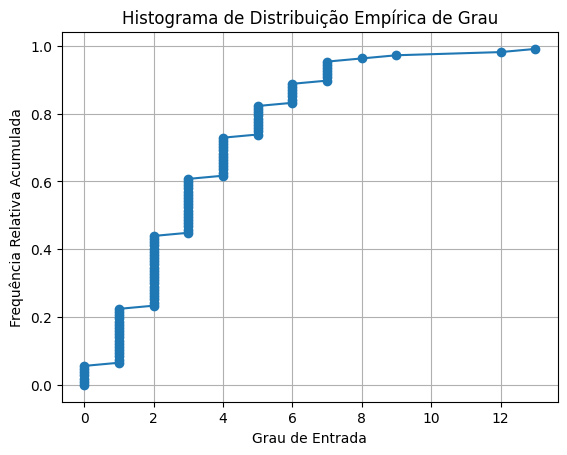

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o arquivo CSV como um DataFrame do pandas
df = pd.read_csv('./stormofswords.csv')

# Criar um objeto de grafo direcionado
G = nx.DiGraph()

# Adicionar as arestas e pesos ao grafo
for _, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    G.add_edge(source, target, weight=weight)

# Calcular o grau de entrada de cada nó (in-degree)
in_degrees = dict(G.in_degree())

# Calcular a frequência dos graus de entrada
degree_counts = list(in_degrees.values())
degree_counts.sort()

# Calcular a frequência relativa acumulada dos graus de entrada
cumulative_frequency = [i / len(degree_counts) for i in range(len(degree_counts))]

# Plotar o histograma de distribuição empírica de grau
plt.plot(degree_counts, cumulative_frequency, marker='o')
plt.xlabel('Grau de Entrada')
plt.ylabel('Frequência Relativa Acumulada')
plt.title('Histograma de Distribuição Empírica de Grau')
plt.grid(True)
plt.show()

#  Coeficiente de clustering local para nós escolhidos.

O coeficiente de clustering local é uma medida usada para quantificar o grau de agrupamento dos nós em uma rede. Ele fornece uma medida de quão próximos os vizinhos de um determinado nó estão conectados entre si. O coeficiente de clustering local é calculado para cada nó individualmente.

### Código para verificar o nó com o maior coeficiente.

In [ ]:
import networkx as nx
import csv

# Criar o grafo
G = nx.Graph()

# Ler o arquivo CSV e adicionar as arestas ao grafo
with open('./stormofswords.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        source = row['Source']
        target = row['Target']
        G.add_edge(source, target)

# Calcular o coeficiente de clustering local para cada nó
local_clustering = nx.clustering(G)

# Encontrar o nó com o maior coeficiente de clustering local
max_node = max(local_clustering, key=local_clustering.get)
max_clustering_coefficient = local_clustering[max_node]

print("Nó com maior coeficiente de clustering local:", max_node)
print("Coeficiente de clustering local:", max_clustering_coefficient)

Nó com maior coeficiente de clustering local: Aerys
Coeficiente de clustering local: 1.0


### Código para calcular o coeficiente de clustering local para os nós escolhidos.

Foi adicionado o nó com maior coeficiente encontrado no código anterior.

In [ ]:
import networkx as nx

# Criando o grafo direcionado
G = nx.DiGraph()

# Lendo os dados do arquivo CSV e adicionando as arestas ao grafo
with open('./stormofswords.csv', 'r') as file:
    next(file)  # Ignorar o cabeçalho
    for line in file:
        source, target, weight = line.strip().split(',')
        G.add_edge(source, target, weight=int(weight))

# Função para calcular o coeficiente de clustering local
def local_clustering_coefficient(graph, node):
    neighbors = set(graph.neighbors(node))
    if len(neighbors) < 2:
        return 0.0

    total_possible_edges = len(neighbors) * (len(neighbors) - 1)
    actual_edges = 0
    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 != neighbor2 and graph.has_edge(neighbor1, neighbor2):
                actual_edges += 1

    return actual_edges / total_possible_edges

# Nós escolhidos para calcular o coeficiente de clustering local
chosen_nodes = ['Tyrion', 'Jon', 'Aerys']

# Calcular o coeficiente de clustering local para os nós escolhidos
for node in chosen_nodes:
    clustering_coefficient = local_clustering_coefficient(G, node)
    print(f"Coeficiente de clustering local para o nó {node}: {clustering_coefficient}")



Coeficiente de clustering local para o nó Tyrion: 0.04891304347826087
Coeficiente de clustering local para o nó Jon: 0.07857142857142857
Coeficiente de clustering local para o nó Aerys: 0.5


# Coeficiente de clustering global.

O coeficiente de clustering global, também conhecido como coeficiente de agrupamento global, é uma medida usada para quantificar o grau de agrupamento dos nós em uma rede.

O coeficiente de clustering global é calculado para toda a rede e fornece uma medida da probabilidade de que os vizinhos de um nó estejam conectados entre si. Em outras palavras, ele mede a tendência dos nós em uma rede formarem agrupamentos ou cliques.

In [ ]:
import csv
import networkx as nx

# Lê o arquivo CSV
with open('./stormofswords.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Pula o cabeçalho
    edges = [(row[0], row[1]) for row in reader]

# Cria um grafo direcionado a partir das arestas
graph = nx.DiGraph()
graph.add_edges_from(edges)

# Calcula o coeficiente de clustering global
clustering_coefficient = nx.average_clustering(graph, count_zeros=True)

print("Coeficiente de Clustering Global:", clustering_coefficient)

Coeficiente de Clustering Global: 0.275721575779998


# Componentes conectados fortemente

Em termos mais simples, um componente conectado fortemente é um grupo de vértices em um grafo direcionado nos quais é possível viajar de um vértice para qualquer outro do grupo seguindo as direções das arestas. Se houver um componente conectado fortemente em um grafo, isso significa que não existem subconjuntos isolados de vértices que não se conectem com o restante do grafo por meio de caminhos direcionados.

In [ ]:
import pandas as pd
import networkx as nx

# Carregar o arquivo CSV
df = pd.read_csv('./stormofswords.csv')

# Criar um grafo direcionado
G = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr='Weight', create_using=nx.DiGraph())

# Encontrar os componentes conectados fortemente
strong_components = nx.strongly_connected_components(G)

# Imprimir os componentes conectados fortemente encontrados
print("Componente Conectado Fortemente:")
for component in strong_components:
    print(component)
    print('---')


# Componentes Conectados Fracamente.

Diferentemente dos componentes conectados fortemente, nos quais todos os nós estão estritamente conectados uns aos outros por meio de arestas direcionadas, os componentes conectados fracamente consideram também as arestas não direcionadas para estabelecer conexões entre nós.

In [54]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import streamlit as st

# Carregar o arquivo CSV
df = pd.read_csv('./stormofswords.csv')

# Criar um grafo direcionado
G = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr='Weight', create_using=nx.DiGraph())

# Encontrar os componentes conectados fracamente
weak_components = nx.weakly_connected_components(G)

# Criar um novo grafo direcionado apenas com o maior componente conectado fracamente
largest_weak_component = max(weak_components, key=len)
G_weak = G.subgraph(largest_weak_component)

# Exibir o gráfico dos componentes conectados fracamente
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_weak)
nx.draw(G_weak, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrowsize=10, font_size=10)
plt.title("Componentes Conectados Fracamente")
plt.axis('off')

# Exibir o gráfico no Streamlit
st.pyplot(plt)

# Listar os componentes conectados fracamente
st.write("Componentes Conectados Fracamente:")
for component in nx.weakly_connected_components(G):
    st.write(component)


# Degree centrality

Degree centrality é uma medida utilizada em análise de redes para quantificar a importância de um nó em um grafo. Ela se baseia no número de conexões de um nó (também conhecido como grau do nó) em relação aos outros nós da rede.

O degree centrality mede a proporção do grau de um nó em relação ao máximo possível. Em outras palavras, é a contagem de conexões do nó dividida pelo número máximo de conexões que um nó pode ter.

O degree centrality é frequentemente usado para identificar nós importantes em uma rede. Os nós com alto degree centrality têm muitas conexões e desempenham um papel fundamental na comunicação e fluxo de informações na rede. Esses nós são considerados importantes para a estrutura e a dinâmica da rede, podendo exercer influência significativa sobre outros nós.

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('./stormofswords.csv')

# Criar um grafo direcionado
G = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=nx.DiGraph())

# Calcular o Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Criar um dicionário para armazenar o Degree Centrality de cada nó
node_degree = {node: degree for node, degree in degree_centrality.items()}

# Exibir o grafo com tamanho dos nós proporcionais ao Degree Centrality
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
node_sizes = [5000 * node_degree[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, edge_color='gray', arrowsize=10, font_size=10)
plt.title("Degree Centrality")
plt.axis('off')
plt.show()

# Imprimir o Degree Centrality de cada nó
print("Degree Centrality:")
for node, degree in degree_centrality.items():
    print(f"Nó: {node}, Degree Centrality: {degree}")


# Closeness centrality. 

Em termos mais simples, o Closeness Centrality quantifica o quão rapidamente um nó pode interagir com outros nós no grafo. Um nó com um alto valor de Closeness Centrality está localizado próximo a muitos outros nós e, portanto, pode acessar rapidamente informações e recursos do resto da rede.

O Closeness Centrality é útil para identificar nós que atuam como "pontes" na rede, conectando diferentes partes do grafo. Esses nós desempenham um papel importante na disseminação de informações e influência dentro da rede.

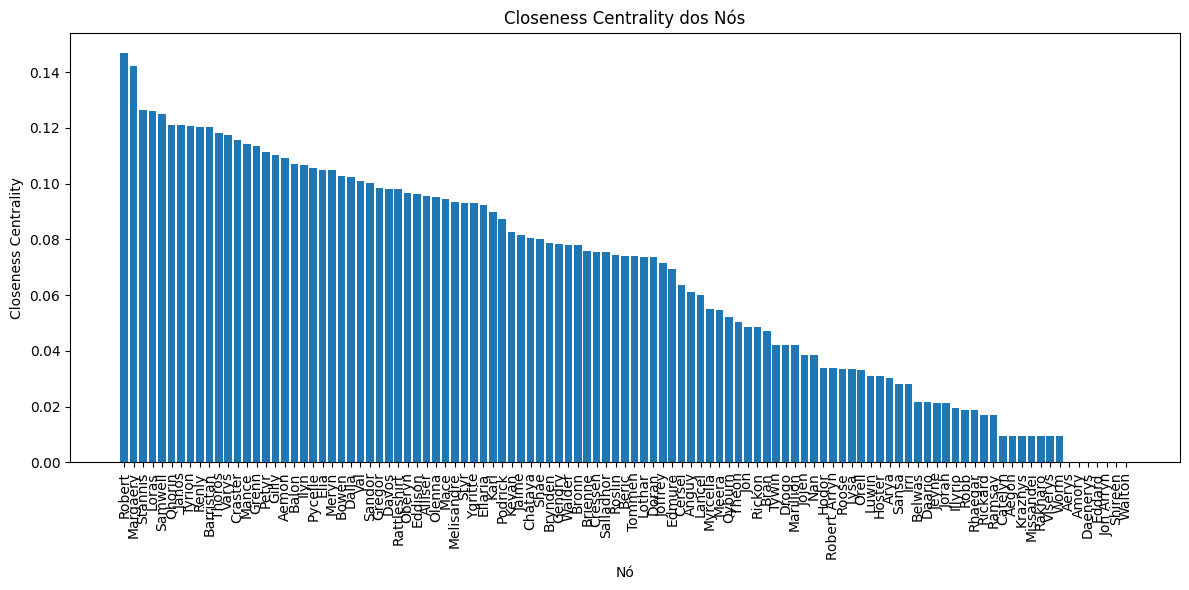

          Nó  Closeness Centrality
0      Aemon              0.109189
1      Grenn              0.113651
2    Samwell              0.124861
3      Aerys              0.000000
4      Jaime              0.081536
..       ...                   ...
102   Ramsay              0.016981
103  Chataya              0.080437
104  Shireen              0.000000
105    Doran              0.073687
106   Walton              0.000000

[107 rows x 2 columns]


In [65]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('./stormofswords.csv')

# Criar um grafo direcionado
G = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=nx.DiGraph())

# Calcular o Closeness Centrality
closeness_centralities = nx.closeness_centrality(G)

# Ordenar os nós pelo Closeness Centrality
sorted_centralities = sorted(closeness_centralities.items(), key=lambda x: x[1], reverse=True)
nodes, centralities = zip(*sorted_centralities)

# Exibir o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(nodes, centralities)
plt.xlabel("Nó")
plt.ylabel("Closeness Centrality")
plt.title("Closeness Centrality dos Nós")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Exibir a lista dos nós e seus Closeness Centralities
node_list = list(closeness_centralities.items())
df_nodes = pd.DataFrame(node_list, columns=['Nó', 'Closeness Centrality'])
print(df_nodes)


# Betweenness centrality.

O Betweenness Centrality é uma medida de centralidade que calcula a importância de um nó com base na frequência com que ele atua como uma ponte entre outros nós no grafo. Em outras palavras, o Betweenness Centrality mede a quantidade de vezes que um nó é necessário para alcançar outros nós em caminhos mais curtos.

Um nó com alto Betweenness Centrality é aquele que tem um papel importante na comunicação e fluxo de informações entre outros nós no grafo. Ele atua como um "intermediário" ou "ponte" para a comunicação entre diferentes partes do grafo.

In [71]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import streamlit as st

# Carregar o arquivo CSV
df = pd.read_csv('./stormofswords.csv')

# Criar um grafo direcionado
G = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr='Weight', create_using=nx.DiGraph())

# Calcular o Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Obter os nós e os valores do Betweenness Centrality
nodes = list(betweenness_centrality.keys())
centrality_values = list(betweenness_centrality.values())

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(nodes, centrality_values)
plt.xlabel('Nós')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality dos nós')
plt.xticks(rotation=90)
plt.tight_layout()

# Exibir o gráfico no Streamlit
st.pyplot(plt)

# Exibir a lista de nós e valores de Betweenness Centrality
st.write("Lista de nós e valores de Betweenness Centrality:")
for node, centrality in zip(nodes, centrality_values):
    st.write(f"Nó: {node}, Betweenness Centrality: {centrality}")


# Eigenvector centrality

O Eigenvector centrality de um nó é calculado com base na ideia de que a importância de um nó está relacionada à importância dos seus vizinhos. Se um nó está conectado a outros nós que também são importantes, então esse nó também é considerado importante.

Matematicamente, o Eigenvector centrality é calculado através do cálculo dos autovetores correspondentes ao maior autovalor da matriz de adjacência ou matriz de conectividade da rede.

<ipython-input-77-c4e3f5bfb0ed>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')
<ipython-input-77-c4e3f5bfb0ed>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(cmap=cmap), label="Eigenvector Centrality")


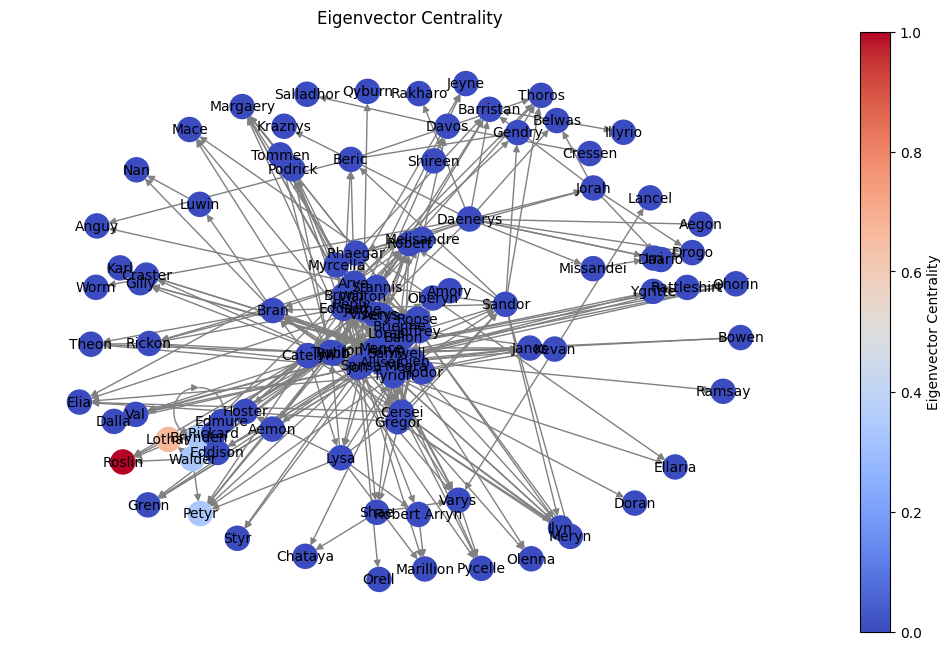

Eigenvector Centrality:
Node: Roslin, Eigenvector Centrality: 0.7499999999999998
Node: Lothar, Eigenvector Centrality: 0.4999999999999999
Node: Petyr, Eigenvector Centrality: 0.2500000000000007
Node: Walder, Eigenvector Centrality: 0.2500000000000001
Node: Brynden, Eigenvector Centrality: 0.25
Node: Qhorin, Eigenvector Centrality: 1.910319895040526e-13
Node: Craster, Eigenvector Centrality: 1.1739887723192127e-13
Node: Karl, Eigenvector Centrality: 1.1673003873191914e-13
Node: Dalla, Eigenvector Centrality: 8.87018742645735e-14
Node: Rattleshirt, Eigenvector Centrality: 8.861196759328727e-14
Node: Gilly, Eigenvector Centrality: 5.858133916957791e-14
Node: Mance, Eigenvector Centrality: 4.442150150550571e-14
Node: Styr, Eigenvector Centrality: 4.434660524176479e-14
Node: Val, Eigenvector Centrality: 4.426480864308018e-14
Node: Ygritte, Eigenvector Centrality: 4.424911911130527e-14
Node: Grenn, Eigenvector Centrality: 3.5151451967371505e-14
Node: Bowen, Eigenvector Centrality: 2.92239930

In [77]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Carregar o arquivo CSV
df = pd.read_csv('./stormofswords.csv')

# Criar um grafo direcionado
G = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr='Weight', create_using=nx.DiGraph())

# Calcular a Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Ordenar os nós de acordo com a Eigenvector centrality
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Exibir o grafo com os nós coloridos de acordo com a Eigenvector centrality
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
node_colors = [eigenvector_centrality[node] for node in G.nodes()]
cmap = cm.get_cmap('coolwarm')
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=cmap, edge_color='gray', arrowsize=10, font_size=10)
plt.title("Eigenvector Centrality")
plt.colorbar(cm.ScalarMappable(cmap=cmap), label="Eigenvector Centrality")
plt.axis('off')
plt.show()

# Imprimir a Eigenvector centrality para cada nó
print("Eigenvector Centrality:")
for node in sorted_nodes:
    print(f"Node: {node}, Eigenvector Centrality: {eigenvector_centrality[node]}")


# Assortatividade geral da rede

A assortatividade é uma medida que indica o grau de tendência dos nós de se conectarem com outros nós que possuem características semelhantes. Ela pode ser aplicada a diferentes atributos dos nós, como grau, idade, gênero, entre outros.

A assortatividade geral de uma rede é uma medida que quantifica a tendência geral da rede em ser assortativa ou disassortativa. Uma rede é dita assortativa quando nós com características semelhantes tendem a se conectar entre si, enquanto uma rede é dita disassortativa quando nós com características diferentes tendem a se conectar entre si.

In [80]:
import pandas as pd
import networkx as nx

# Carregar o arquivo CSV
df = pd.read_csv('./stormofswords.csv')

# Criar um grafo direcionado
G = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr='Weight', create_using=nx.DiGraph())

# Calcular o coeficiente de assortatividade
assortativity = nx.degree_assortativity_coefficient(G)

# Imprimir o coeficiente de assortatividade
print("Assortatividade Geral da Rede:", assortativity)


Assortatividade Geral da Rede: 0.04497368321246008
